<a href="https://colab.research.google.com/github/Sweekar-Bajimaya/Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
! pip install opendatasets

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data")
df = pd.read_csv("creditcardfraud/creditcard.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bajimayasweekar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 1.24GB/s]

In [4]:
print("Dataset Info: \n")
df.info()

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64

In [6]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (284807, 31)


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Checking class Imabalance

In [14]:
# Check class distribution
print(df['Class'].value_counts())

# Percentage of Fraud Cases
fraud_percentage = (df['Class'].value_counts()[1]/df.shape[0])*100
print(f"\nFraudulent transactions percentage: {fraud_percentage:.4f}%")

Class
0    284315
1       492
Name: count, dtype: int64

Fraudulent transactions percentage: 0.1727%


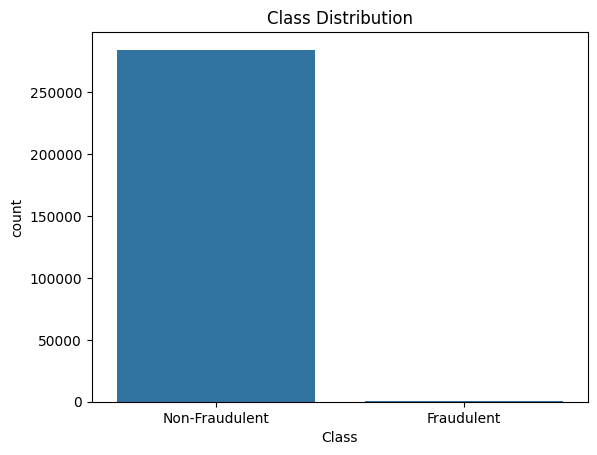

In [16]:
# Plot Class Distribution
sns.countplot(x='Class', data = df)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

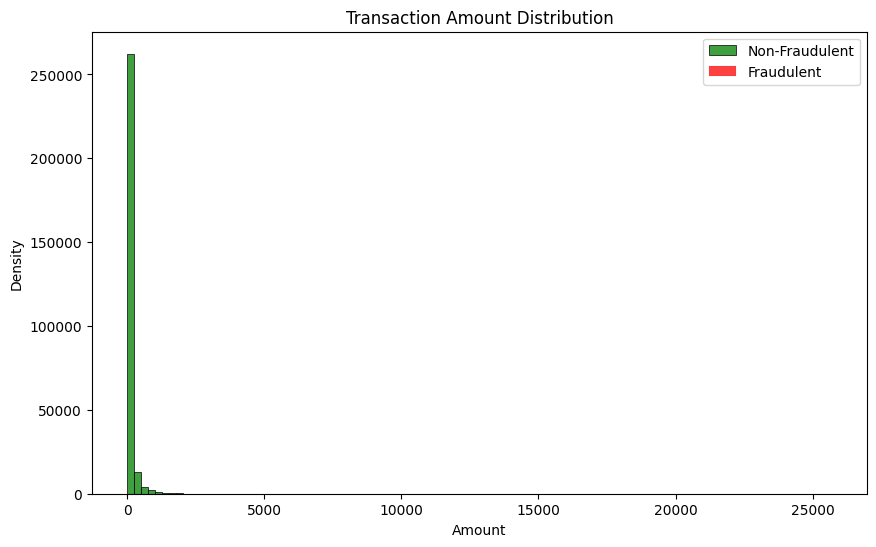

In [19]:
# Compare transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class']==0]['Amount'],bins = 100, color = 'green', label = 'Non-Fraudulent')
sns.histplot(df[df['Class']==1]['Amount'],bins = 100, color = 'red',label = 'Fraudulent')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

The dataset is mostly preprocessed using PCA, but the Amount and Time columns are not scaled. We’ll fix that.

In [27]:
# Creating new scaled features
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Droping the Old Ones
df = df.drop(['Time', 'Amount'],axis=1)

In [28]:
# Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

In [30]:
# train and test split before applying SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

# Applying SMOTE to Train Data
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Check resampling after apllying smote
print("Before SMOTE train:", Y_train.value_counts())
print("After SMOTE train:", Y_train_smote.value_counts())

Before SMOTE train: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE train: Class
0    227451
1    227451
Name: count, dtype: int64
